<a href="https://colab.research.google.com/github/astromad/MyDeepLearningRepo/blob/master/HOML_ch10_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
def load_dataset():
  print('----Loading Data----')
  fashion_mnist = keras.datasets.fashion_mnist
  (X_train_full,Y_train_full),(X_test,Y_test) = fashion_mnist.load_data()
  classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  print('Full training set shape',X_train_full.shape)
  print('Full test set shape',X_test.shape)
  X_train,X_valid = X_train_full[5000:]/255.0, X_train_full[:5000]/255.0
  Y_train,Y_valid = Y_train_full[5000:], Y_train_full[:5000]
  print('training set shape',X_train.shape)
  print('validation set shape',X_valid.shape)
  return (X_train, Y_train), (X_valid, Y_valid), (X_test,Y_test), classes

In [3]:
def build_model(X_train,classes,name='Default Model'):
  print('----Building Model----')
  input_shape = X_train.shape[1:]
  output_shape = len(classes)
  print('input shape',input_shape)
  print('output shape',output_shape)
  model = keras.models.Sequential(name='My_Classification_Model')
  model.add(keras.layers.Input(shape=input_shape))
  model.add(keras.layers.Flatten(name='L_flatten1'))
  model.add(keras.layers.Dense(300,activation='relu',name='L_dense1'))
  model.add(keras.layers.Dense(100,activation='relu',name='L_dense2'))
  model.add(keras.layers.Dense(output_shape,activation='softmax',name='L_output'))
  return model

In [4]:
def displayModelGraph(model):
  print('----Displaying Model Graph----')
  print(model.summary())
  print(model.layers)
  keras.utils.plot_model(model, to_file=model.name+'.png')
  #SVG(keras.utils.model_to_dot(model).create(prog='dot', format='svg'))
  img=mpimg.imread(model.name+'.png')
  imgplot = plt.imshow(img)
  plt.show()

In [5]:
def modelPredict(model, classes, X_test, Y_test, samples=3):
  print('----Predicting Model----')
  X_new = X_test[:samples]
  Y_prob = model.predict(X_new)
  print("Probability from Model:")
  print(Y_prob.round(2))
  # Y_pred = model.predict_classes(X_new)
  # print(Y_pred)
  Y_pred = np.argmax(Y_prob, axis=-1)
  # print(Y_pred)
  print("prediction from Model:")
  print(np.array(classes)[Y_pred].reshape(-1, 1))
  print('Label data:')
  print(Y_test[:samples])

In [6]:
def showWeights(model,layer=0):
  print('----Display Weights----')
  weights,biasses = model.layers[layer].get_weights()
  print('weights shape',weights.shape)
  print('bias shape',biasses.shape)
  print(weights[0])
  print(biasses)

In [7]:
def displayLoss(history):
  print('----Plotting Loss----')
  pd.DataFrame(history.history).plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()

In [8]:
def evaluateModel(model,X_test,Y_test):
  print('----Evaluating Model----')
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Model evaluation on test set:')
  print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [9]:
def plot_history(history):
  print('----Plotting Loss----')
  accuracy = history.history['sparse_categorical_accuracy']
  val_accuracy = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(accuracy) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, accuracy, 'b', label='Training acc')
  plt.plot(x, val_accuracy, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

In [10]:
def main():
  print('Tensorflow Version',tf.__version__)
  print('Keras Version',keras.__version__)
  (X_train, Y_train), (X_valid,Y_valid), (X_test, Y_test), classes = load_dataset()
  model = build_model(X_train,classes,name='My_Classification_Model')
  displayModelGraph(model)
  showWeights(model,layer=1)
  model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
  history= model.fit(X_train,Y_train,epochs=3,validation_data=(X_valid,Y_valid))
  displayLoss(history)
  plot_history(history)
  evaluateModel(model,X_test,Y_test)
  modelPredict(model, classes, X_test, Y_test, samples=5)
  

Tensorflow Version 2.2.0
Keras Version 2.3.0-tf
----Loading Data----
Full training set shape (60000, 28, 28)
Full test set shape (10000, 28, 28)
training set shape (55000, 28, 28)
validation set shape (5000, 28, 28)
----Building Model----
input shape (28, 28)
output shape 10
----Displaying Model Graph----
Model: "My_Classification_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L_flatten1 (Flatten)         (None, 784)               0         
_________________________________________________________________
L_dense1 (Dense)             (None, 300)               235500    
_________________________________________________________________
L_dense2 (Dense)             (None, 100)               30100     
_________________________________________________________________
L_output (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable para

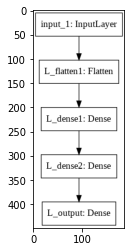

----Display Weights----
weights shape (784, 300)
bias shape (300,)
[-0.06758789 -0.03518997  0.06962571 -0.01124291  0.01398452  0.03714479
 -0.0677615  -0.03598728  0.00139409 -0.06298066 -0.00987892 -0.06618389
  0.0147436   0.03886699 -0.01604348 -0.05147539  0.04332432 -0.07114304
 -0.03783415 -0.01352598  0.03607885 -0.028932   -0.01579004  0.01005889
 -0.03347678  0.0371149   0.03997552  0.02301073 -0.05149093  0.06250222
 -0.04904882  0.06334911  0.01673347 -0.06146695  0.03431473  0.05660744
  0.06786695  0.0449836   0.01434478 -0.01681208  0.0394123  -0.07012989
 -0.04108591 -0.01235945 -0.05640604 -0.04670794 -0.04259146  0.04061475
 -0.04738799  0.00809173 -0.00214167  0.07037036 -0.07274239 -0.03983023
 -0.0314162  -0.03176889  0.04791535 -0.02488309  0.01818006  0.00737523
 -0.06627779 -0.0437672   0.02461193  0.0273095   0.05274525  0.02988626
 -0.03299936 -0.04359391  0.04969033 -0.01408396 -0.00632298  0.00558536
  0.07236852  0.01892415 -0.05820783  0.00943049 -0.05492

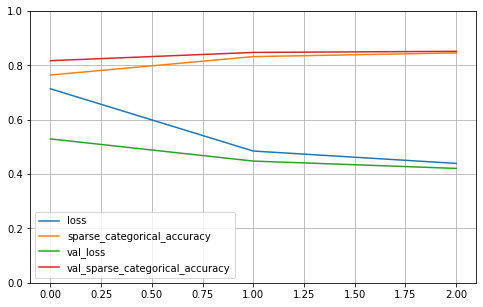

----Plotting Loss----
----Evaluating Model----
Model evaluation on test set:
Test loss: 87.26691436767578 / Test accuracy: 0.7944999933242798
----Predicting Model----
Probability from Model:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
prediction from Model:
[['Ankle boot']
 ['Pullover']
 ['Trouser']
 ['Trouser']
 ['Shirt']]
Label data:
[9 2 1 1 6]


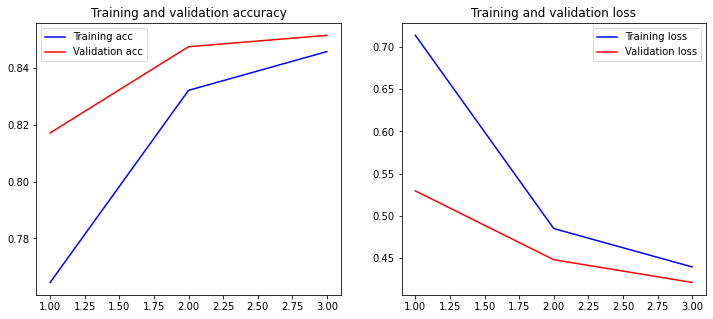

In [11]:
main()